In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
from matplotlib.pyplot import imshow
import cv2


import seaborn as sns

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
root_path = "C:/Users/ASUS/Desktop/College/Poverty/dataset/dataset/"

In [3]:
mex_impaths = [f for f in os.listdir(root_path)]
data = []
for m in mex_impaths:
    country , year  = m.split(".")[0].split("_")
    data.append((country,year,m))

In [4]:
img_df = pd.DataFrame(data , columns=["code" , "year" , "path"])
img_df.head()

,code,year,path
0,AUS,1992,AUS_1992.png_0_1924.jpeg
1,AUS,1992,AUS_1992.png_0_2837.jpeg
2,AUS,1992,AUS_1992.png_0_3130.jpeg
3,AUS,1992,AUS_1992.png_0_3346.jpeg
4,AUS,1992,AUS_1992.png_0_3525.jpeg


In [5]:
gdp = pd.read_csv("C:/Users/ASUS/Desktop/College/Poverty/gdp_melted.csv")

In [6]:
gdp["year"] = gdp["year"].astype(int)
img_df["year"] = img_df["year"].astype(int)

In [7]:
merged_df = pd.merge(img_df, gdp , on=["code" , "year"])
merged_df.head()

,code,year,path,Unnamed: 0,country,indicator,indicator_code,gdp
0,AUS,1992,AUS_1992.png_0_1924.jpeg,8459,Australia,GDP (current US$),NY.GDP.MKTP.CD,3.248790e+11
1,AUS,1992,AUS_1992.png_0_2837.jpeg,8459,Australia,GDP (current US$),NY.GDP.MKTP.CD,3.248790e+11
2,AUS,1992,AUS_1992.png_0_3130.jpeg,8459,Australia,GDP (current US$),NY.GDP.MKTP.CD,3.248790e+11
3,AUS,1992,AUS_1992.png_0_3346.jpeg,8459,Australia,GDP (current US$),NY.GDP.MKTP.CD,3.248790e+11
4,AUS,1992,AUS_1992.png_0_3525.jpeg,8459,Australia,GDP (current US$),NY.GDP.MKTP.CD,3.248790e+11


In [8]:
df = merged_df.dropna()

In [9]:
df = df.sample(frac=1)

0
100
200
300
400
500
600
700
800
900
1000


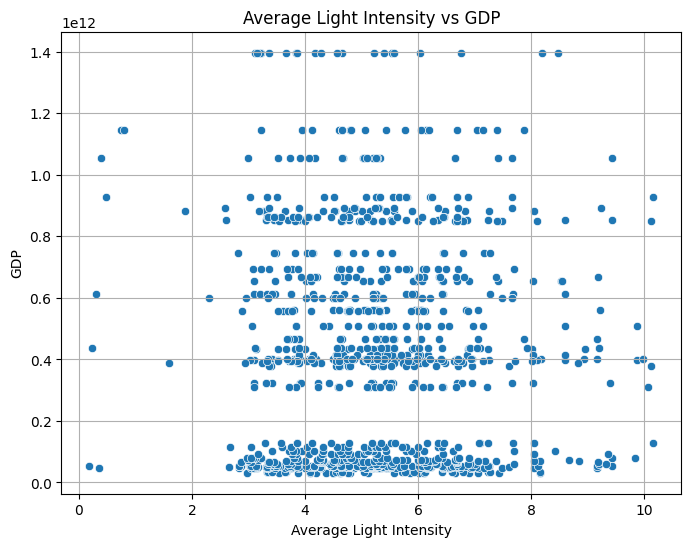

In [10]:

imgs = []
light_intensity = []
for j, row in enumerate(df.iterrows()):
    img = cv2.imread(root_path + row[1]["path"], 0)
    avg_light = np.mean(img)
    light_intensity.append(avg_light)
    img = cv2.resize(img, (256,256))
    img = img.reshape((256,256,1))
    imgs.append(img)
    if j%100 == 0:
        print(j)
    if(j == 1000):
        break
merged_df = merged_df.iloc[:1001].copy()
merged_df["avg_light_intensity"] = light_intensity

# === 4. Visualize Light Intensity vs GDP ===
plt.figure(figsize=(8, 6))
sns.scatterplot(x="avg_light_intensity", y="gdp", data=merged_df)
plt.title("Average Light Intensity vs GDP")
plt.xlabel("Average Light Intensity")
plt.ylabel("GDP")
plt.grid(True)
plt.show()

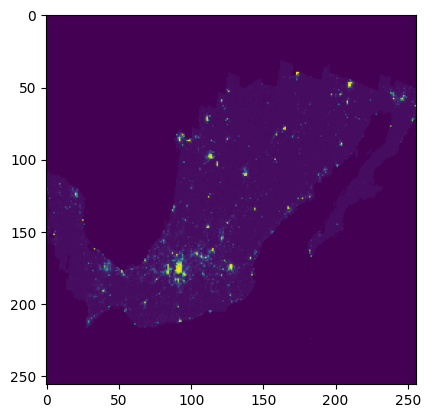

In [11]:
imshow(imgs[100])

In [12]:
eq = []
for img in imgs[:]:
    equ = cv2.equalizeHist(img[:,:,0])
    eq.append(equ.reshape((256,256,1)))

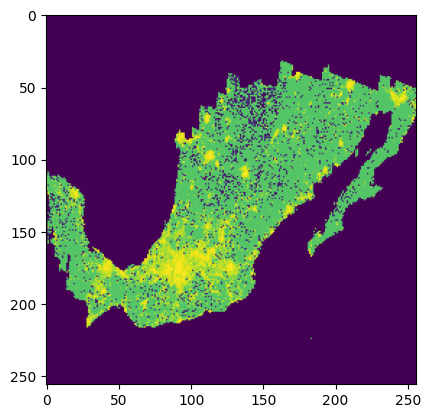

In [13]:
imshow(eq[100])

In [14]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.models import Sequential

In [15]:
model = Sequential()
model.add(Conv2D(32, 5, input_shape=(256,256,1), activation = 'relu'))
model.add(MaxPooling2D(4))
model.add(Conv2D(64, 3, activation = 'relu'))
model.add(MaxPooling2D(4))
model.add(Conv2D(64, 2, activation = 'relu'))
model.add(MaxPooling2D(4))
model.add(Conv2D(128, 2, activation = 'relu'))
model.add(Flatten())
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 252, 252, 32)   │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │       513,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       256,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 838,185 (3.20 MB)

 Trainable params: 838,185 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam', loss='mae', metrics=['mae', 'accuracy'])

In [18]:
imgs = np.array(eq)
y = np.array(df['gdp'])
y = y[:1001].reshape((1001, 1))
translation = y.min()
y = y-y.min()
scale = y.max()
y = y/y.max()
print(imgs.shape, y.shape)


(1001, 256, 256, 1) (1001, 1)


In [19]:
history = model.fit(imgs, y, validation_split = 0.1, epochs = 50)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 485ms/step - accuracy: 0.0183 - loss: 13.8755 - mae: 13.8755 - val_accuracy: 0.0198 - val_loss: 0.1816 - val_mae: 0.1816
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 456ms/step - accuracy: 0.0127 - loss: 0.1153 - mae: 0.1153 - val_accuracy: 0.0198 - val_loss: 0.0923 - val_mae: 0.0923
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 21s 481ms/step - accuracy: 0.0105 - loss: 0.0834 - mae: 0.0834 - val_accuracy: 0.0198 - val_loss: 0.0774 - val_mae: 0.0774
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 462ms/step - accuracy: 0.0088 - loss: 0.0753 - mae: 0.0753 - val_accuracy: 0.0198 - val_loss: 0.0775 - val_mae: 0.0775
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 607ms/step - accuracy: 0.0124 - loss: 0.0662 - mae: 0.0662 - val_accuracy: 0.0198 - val_loss: 0.0791 - val_mae: 0.0791
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 18s 510ms/step - accuracy: 0.0131 - loss: 0.0734 - mae: 0.0734 - val_accuracy: 0.0198 - val_loss: 0.0794 - val_mae: 0.0794
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━

In [28]:
model.save("gdp_model.h5")
np.save("translation.npy", translation)
np.save("scale.npy", scale)
print("Model and scaler saved successfully.")


Model and scaler saved successfully.


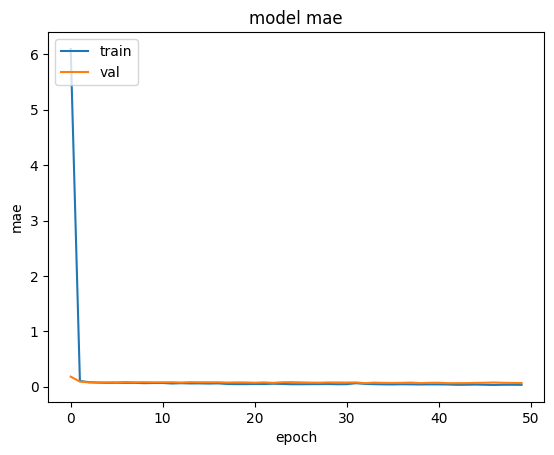

In [21]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [22]:
plt.savefig("maevsepoch.jpg")

<Figure size 640x480 with 0 Axes>

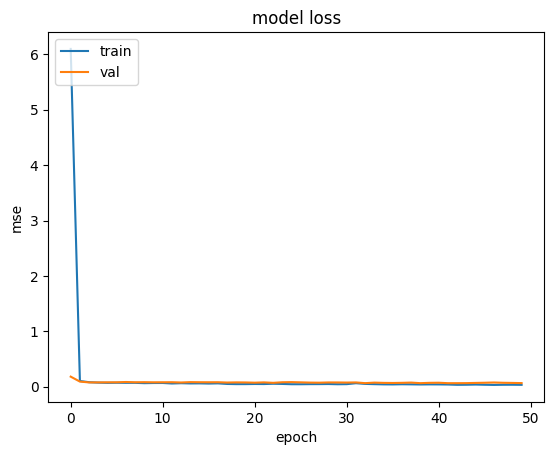

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
plt.savefig("msevsepoch.jpg")

<Figure size 640x480 with 0 Axes>

In [29]:
# idx = [10,100,500,125,562,852,522,578,456]
# for idd in idx:
#     y_true = y[idd]*scale + translation
#     y_pred = model.predict(imgs[idd:idd+1])
#     y_pred = y_pred*scale + translation
#     print("Actual: {} Predicted: {}".format(y_true, y_pred))

idx = [10, 100, 500, 125, 562, 852, 522, 578, 456]
y_true_list, y_pred_list = [], []

for idd in idx:
    y_true = y[idd]
    y_pred = model.predict(imgs[idd:idd+1])[0][0] * scale + translation
    y_true_list.append(y_true[0])
    y_pred_list.append(y_pred)
    print(f"Actual: {y_true[0]:.2f} | Predicted: {y_pred:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Actual: 0.08 | Predicted: 759711941358.76
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Actual: 0.10 | Predicted: 804239920810.25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Actual: 0.53 | Predicted: 4151098893960.85
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Actual: 0.05 | Predicted: 419773782740.73
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Actual: 0.18 | Predicted: 1264216443978.28
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Actual: 0.26 | Predicted: 2011457660549.11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Actual: 0.01 | Predicted: 44912845935.46
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Actual: 0.16 | Predicted: 815515540400.18
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Actual: 0.57 | Predicted: 4642370648468.69


In [26]:
from sklearn.metrics import mean_absolute_error, r2_score

y_true_list = []
y_pred_list = []

for idd in idx:
    y_true = y[idd]*scale + translation
    y_pred = model.predict(imgs[idd:idd+1])
    y_pred = y_pred*scale + translation
    
    y_true_list.append(y_true[0])
    y_pred_list.append(y_pred[0][0])

    print("Actual: {:.2f} Predicted: {:.2f}".format(y_true[0], y_pred[0][0]))

# Calculate error metrics
mae = mean_absolute_error(y_true_list, y_pred_list)
r2 = r2_score(y_true_list, y_pred_list)

print("\nMean Absolute Error (MAE): {:.2f}".format(mae))
print("R-squared (R²): {:.2f}".format(r2))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Actual: 599389000000.00 Predicted: 759711924224.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Actual: 782241000000.00 Predicted: 804239900672.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Actual: 4032510000000.00 Predicted: 4151098736640.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Actual: 437799000000.00 Predicted: 419773775872.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Actual: 1396650000000.00 Predicted: 1264216440832.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Actual: 1955350000000.00 Predicted: 2011457650688.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Actual: 69442943089.00 Predicted: 44912844800.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Actual: 1211350000000.00 Predicted: 815515500544.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Actual: 4303540000000.00 Predicted: 4642370486272.00

Mean Absolute Error (MAE): 140741342170.78
R-squared (R²): 0.98
